# Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance

In this exercise, you will implement regularized linear regression and use it to study models with different bias-variance properties.

## 1. Regularized Linear Regression

### 1.1. Visualizing the dataset

We will begin by visualizing the dataset containing historical records on the change in the water level, $x$, and the amount of water flowing out of the dam, $y$.

This dataset is divided into three parts:

- A training set that your model will learn on: $X$, $y$.
- A cross validation set for determining the regularization parameter: $X_{val}$, $y_{val}$.
- A test set for evaluating performance. These are “unseen” examples which your model did not see during training: $X_{test}$, $y_{test}$.

In [2]:
# Import function to load .mat files
from scipy.io import loadmat

In [3]:
# Load data
data = loadmat('ex5data1.mat')
X = data['X']
y = data['y']
y = y.T[0]
Xval = data['Xval']
yval = data['yval']
yval = yval.T[0]
Xtest = data['Xtest']
ytest = data['ytest']
ytest = ytest.T[0]

In [4]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, 'Water flowing out of the dam')

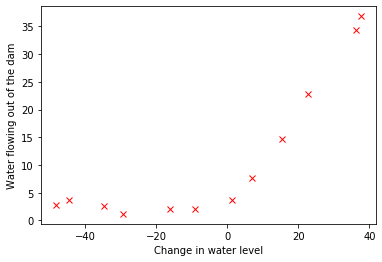

In [10]:
# Plot the training data
plt.plot(X.T[0], y, 'rx')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')

### 1.2. Regularized linear regression cost function and gradient

Recall that the regularized linear regression have the following cost function and gradient:

$$
J(\boldsymbol{\theta}) = \frac{1}{2m}\left[\left\lvert\left\lvert\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}\right\rvert\right\rvert^2 + \lambda \left\lvert\left\lvert \boldsymbol{A}\boldsymbol{\theta}\right\rvert\right\rvert^2\right],
$$

$$
\frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{m} \boldsymbol{X}^T (\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}) + \frac{\lambda}{m}A^T A\boldsymbol{\theta} = \frac{1}{m} \boldsymbol{X}^T (\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}) + \frac{\lambda}{m}A\boldsymbol{\theta}.
$$

with

$$
A = \left[\begin{array}{cc}
0 & \boldsymbol{0}_{1\times n} \\
\boldsymbol{0}_{n\times 1} & \boldsymbol{I}_{n \times n}\\
\end{array}\right]
$$

In [12]:
# Import libraries
import numpy as np

In [14]:
# Cost and cost gradient
def cost(theta, X, y, l):
    m, np1 = X.shape
    A = np.block([[np.zeros((1, 1)), np.zeros((1, np1 - 1))],
                  [np.zeros((np1 - 1, 1)), np.eye(np1 - 1)]])
    return (np.linalg.norm(X.dot(theta) - y)**2 + l * np.linalg.norm(A.dot(theta))**2) / (2 * m)
def cost_grad(theta, X, y, l):
    m, np1 = X.shape
    A = np.block([[np.zeros((1, 1)), np.zeros((1, np1 - 1))],
                  [np.zeros((np1 - 1, 1)), np.eye(np1 - 1)]])
    return (X.T.dot(X.dot(theta) - y) + l * A.dot(theta)) / m

### 1.3. Fitting linear regression

In this part, we set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension. In the later parts of the exercise, you will be using polynomial regression with regularization.

In [15]:
# Numerical minimizer
from scipy.optimize import minimize

In [19]:
solution = minimize(fun=cost,
                    x0=np.zeros(2),
                    args=(np.block([np.ones((len(y), 1)), X]), y, 0),
                    jac=cost_grad)

In [22]:
theta = solution.x
solution

      fun: 22.373906495108912
 hess_inv: array([[1.03142187, 0.00617881],
       [0.00617881, 0.001215  ]])
      jac: array([-3.40468394e-15,  2.33886984e-14])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([13.08790351,  0.36777923])

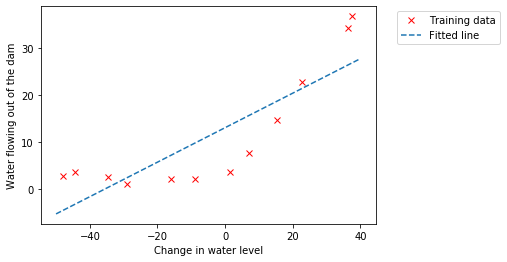

In [23]:
# Plot the training data and fitted line
x_num = np.linspace(-50, 40)
y_num = np.block([np.ones((len(x_num), 1)), np.array([x_num]).T]).dot(theta)
plt.plot(X.T[0], y, 'rx', label='Training data')
plt.plot(x_num, y_num, '--', label='Fitted line')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model. In the next section, you will implement a function to generate learning curves that can help you debug your learning algorithm even if it is not easy to visualize the data.

## Bias-variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

### 2.1. Learning curves

You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size.

To plot the learning curve, we need a training and cross validation set error for different training set sizes.

In [26]:
# Learning curves
J_train = []
J_val = []
for i in range(1, len(y) + 1):
    theta = minimize(fun=cost,
                     x0=np.zeros(2),
                     args=(np.block([np.ones((len(y[:i]), 1)), X[:i]]), y[:i], 0),
                     jac=cost_grad).x
    J_train.append(cost(theta, np.block([np.ones((len(y[:i]), 1)), X[:i]]), y[:i], 0))
    J_val.append(cost(theta, np.block([np.ones((len(yval), 1)), Xval]), yval, 0))

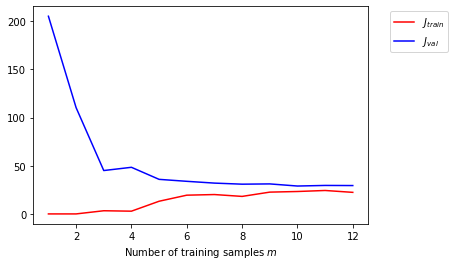

In [28]:
plt.plot(range(1, len(y) + 1), J_train, 'r', label='$J_{train}$')
plt.plot(range(1, len(y) + 1), J_val, 'b', label='$J_{val}$')
plt.xlabel('Number of training samples $m$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

## 3. Polynomial regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features.

For use polynomial regression, our hypothesis has the form:

$$
h_{\theta}(x) = \theta_0 + \theta_1 \times waterLevel + \theta_2 \times (waterLevel)^2 + \dots + \theta_p \times (waterLevel)^p
$$

Notice that by defining $x_1 = (waterLevel)$, $x_2 = (waterLevel)^2$ , . . . , $x_p = (waterLevel)^p$ , we obtain a linear regression model where the features are the various powers of the original value (waterLevel).

In [29]:
# Define X_poly
p = 8
X_poly = np.block([X**i for i in range(1, p + 1)])

In [32]:
# Normalize features
mu, sigma = X_poly.mean(axis=0), X_poly.std(axis=0)
X_poly = (X_poly - mu) / sigma

In [34]:
# Define val features
X_poly_val = np.block([Xval**i for i in range(1, p + 1)])
X_poly_val = (X_poly_val - mu) / sigma

In [35]:
# Define test features
X_poly_test = np.block([Xtest**i for i in range(1, p + 1)])
X_poly_test = (X_poly_test - mu) / sigma

### Polynomial regression $\lambda = 0$

In [61]:
# Learn polynomial regression
solution = minimize(fun=cost,
                    x0=np.zeros(9),
                    args=(np.block([np.ones((len(y), 1)), X_poly]), y, 0),
                    jac=cost_grad)
theta = solution.x
theta

array([ 11.21758918,   9.12523972,  18.17176688,  28.98472056,
       -27.19983046, -74.61697337,   6.66625796,  60.80635119,
        20.73324805])

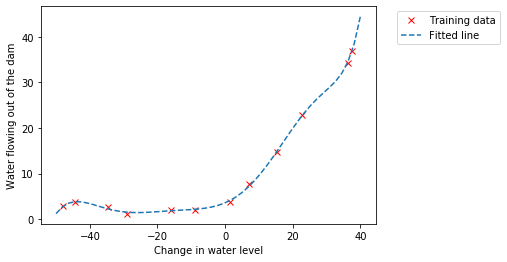

In [43]:
# Plot the training data and fitted line
x_num = np.linspace(-50, 40)
X_poly_num = np.block([np.array([x_num]).T**i for i in range(1, p + 1)])
X_poly_num = (X_poly_num - mu) / sigma
y_num = np.block([np.ones((len(x_num), 1)), X_poly_num]).dot(theta)
plt.plot(X.T[0], y, 'rx', label='Training data')
plt.plot(x_num, y_num, '--', label='Fitted line')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

In [50]:
# Learning curves
J_train = []
J_val = []
for i in range(1, len(y) + 1):
    theta = minimize(fun=cost,
                     x0=np.zeros(9),
                     args=(np.block([np.ones((len(y[:i]), 1)), X_poly[:i]]), y[:i], 0),
                     jac=cost_grad).x
    J_train.append(cost(theta, np.block([np.ones((len(y[:i]), 1)), X_poly[:i]]), y[:i], 0))
    J_val.append(cost(theta, np.block([np.ones((len(yval), 1)), X_poly_val]), yval, 0))

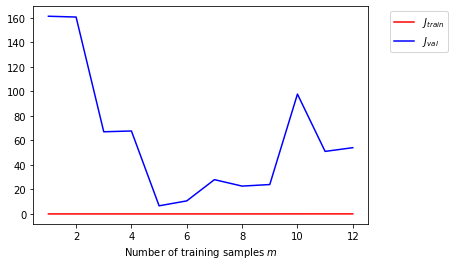

In [51]:
plt.plot(range(1, len(y) + 1), J_train, 'r', label='$J_{train}$')
plt.plot(range(1, len(y) + 1), J_val, 'b', label='$J_{val}$')
plt.xlabel('Number of training samples $m$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

### Polynomial regression $\lambda = 1$

In [60]:
# Learn polynomial regression
solution = minimize(fun=cost,
                    x0=np.zeros(9),
                    args=(np.block([np.ones((len(y), 1)), X_poly]), y, 1),
                    jac=cost_grad)
theta = solution.x
theta

array([11.21758914,  8.36724333,  5.10199905,  3.39012069,  2.15885017,
        1.62044468,  0.9724768 ,  1.02576098,  0.32263471])

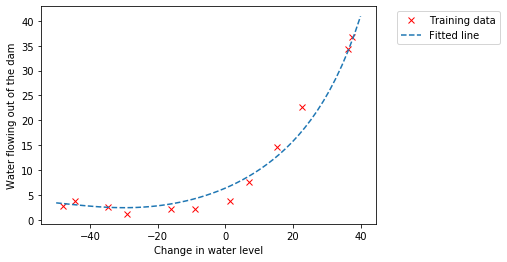

In [55]:
# Plot the training data and fitted line
x_num = np.linspace(-50, 40)
X_poly_num = np.block([np.array([x_num]).T**i for i in range(1, p + 1)])
X_poly_num = (X_poly_num - mu) / sigma
y_num = np.block([np.ones((len(x_num), 1)), X_poly_num]).dot(theta)
plt.plot(X.T[0], y, 'rx', label='Training data')
plt.plot(x_num, y_num, '--', label='Fitted line')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

In [58]:
# Learning curves
J_train = []
J_val = []
for i in range(1, len(y) + 1):
    theta = minimize(fun=cost,
                     x0=np.zeros(9),
                     args=(np.block([np.ones((len(y[:i]), 1)), X_poly[:i]]), y[:i], 1),
                     jac=cost_grad).x
    J_train.append(cost(theta, np.block([np.ones((len(y[:i]), 1)), X_poly[:i]]), y[:i], 0))
    J_val.append(cost(theta, np.block([np.ones((len(yval), 1)), X_poly_val]), yval, 0))

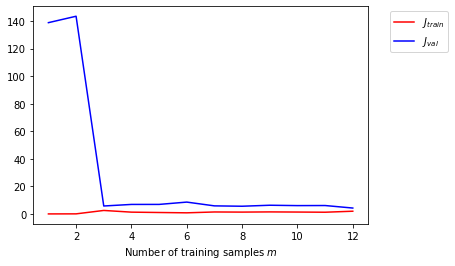

In [59]:
plt.plot(range(1, len(y) + 1), J_train, 'r', label='$J_{train}$')
plt.plot(range(1, len(y) + 1), J_val, 'b', label='$J_{val}$')
plt.xlabel('Number of training samples $m$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

### Selecting $\lambda$ using a cross validation set

From the previous parts of the exercise, you observed that the value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda = 0$) fits the training set well, but does not generalize.

A good choice of $\lambda$ (e.g., $\lambda = 1$) can provide a good fit to the data.

In this section, you will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

In [65]:
# Validation curves
J_train = []
J_val = []
Lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
for l in Lambdas:
    theta = minimize(fun=cost,
                     x0=np.zeros(9),
                     args=(np.block([np.ones((len(y), 1)), X_poly]), y, l),
                     jac=cost_grad).x
    J_train.append(cost(theta, np.block([np.ones((len(y), 1)), X_poly]), y, 0))
    J_val.append(cost(theta, np.block([np.ones((len(yval), 1)), X_poly_val]), yval, 0))

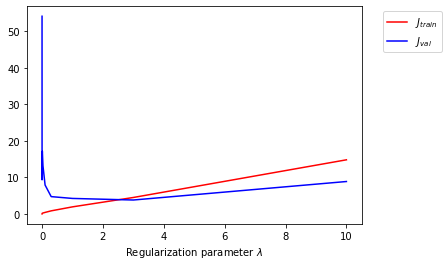

In [66]:
plt.plot(Lambdas, J_train, 'r', label='$J_{train}$')
plt.plot(Lambdas, J_val, 'b', label='$J_{val}$')
plt.xlabel('Regularization parameter $\lambda$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

A good choice for $\lambda$ would be:

In [69]:
Lambdas[np.array(J_val).argmin()]

3

### Computing the test set error

In the previous part of the exercise, you implemented code to compute the cross validation error for various values of the regularization parameter $\lambda$.

However, to get a better indication of the model’s performance in the real world, it is important to evaluate the “final” model on a test set that was not used in any part of training (that is, it was neither used to select the $\lambda$ parameters, nor to learn the model parameters $\theta$).

In [70]:
# Find theta for the optimal regularization parameter
theta = minimize(fun=cost,
                 x0=np.zeros(9),
                 args=(np.block([np.ones((len(y), 1)), X_poly]), y, 3),
                 jac=cost_grad).x

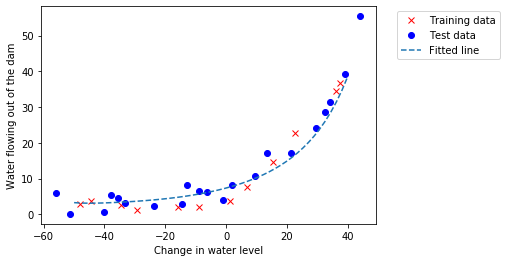

In [74]:
# Plot the training data and fitted line
x_num = np.linspace(-50, 40)
X_poly_num = np.block([np.array([x_num]).T**i for i in range(1, p + 1)])
X_poly_num = (X_poly_num - mu) / sigma
y_num = np.block([np.ones((len(x_num), 1)), X_poly_num]).dot(theta)
plt.plot(X.T[0], y, 'rx', label='Training data')
plt.plot(Xtest.T[0], ytest, 'ob', label='Test data')
plt.plot(x_num, y_num, '--', label='Fitted line')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

In [71]:
# Evaluate the cost function over the test samples
J_test = cost(theta, np.block([np.ones((len(ytest), 1)), X_poly_test]), ytest, 0)

In [72]:
J_test

3.572026646133373

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>